In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

k = 10
N = 100000 ## time steps
epsilon = 0.9
alpha = 0.005
num_times_explored = 0

qs = np.random.randn(k)
OptimalAction = np.argmax(qs)
Sort_index = np.argsort(qs)

SelectedActions = np.zeros(N)
Reward = np.zeros(N)
Q = np.zeros(k)
Counter = np.zeros(k)
a_i = np.zeros(k)
b_i = np.zeros(k)
A_epsilon = epsilon

for i in range(0,k):
  a_i[Sort_index[i]] = i/k
  b_i[Sort_index[i]] = (i+1)/k

for i in range(0,N):
  max_ = max(Q)
  A = random.choice([i for i in range(len(Q)) if Q[i] == max_])
  # Exploration
  if np.random.rand() < epsilon:
    A =  np.random.randint(k)
    num_times_explored +=1

  SelectedActions[i] = A
  Counter[A] = Counter[A]+1
  Reward[i] = np.random.uniform(a_i[A],b_i[A])
  Q[A] = Q[A] + 1/Counter[A]*(Reward[i] - Q[A])
  if i > (2*k):
    epsilon = epsilon * (1-alpha)
  else:
    epsilon = A_epsilon * ((N-i)/N)

OAP = np.mean(SelectedActions == OptimalAction)
print("optimal_Action:", OptimalAction)
print("BANDIT_PROBABILITIES:", qs)
print("Counter_optimal_Selected:", Counter)
print('Optimal Action Percent = ' , OAP*100,'%')
print("num_times_explored:", num_times_explored)
print("num_times_exploited:", N-num_times_explored)

optimal_Action: 9
BANDIT_PROBABILITIES: [ 0.89485234  1.26366984 -0.21832474  0.22758615 -0.64696673  0.48343481
  0.39043538 -0.35679032  0.36991733  1.94023978]
Counter_optimal_Selected: [1.9000e+01 2.1000e+01 1.9000e+01 2.4000e+01 1.5000e+01 1.6000e+01
 2.5000e+01 2.0000e+01 1.6000e+01 9.9825e+04]
Optimal Action Percent =  99.825 %
num_times_explored: 200
num_times_exploited: 99800


Text(0.5, 1.0, 'e-Greegy Selected Actions')

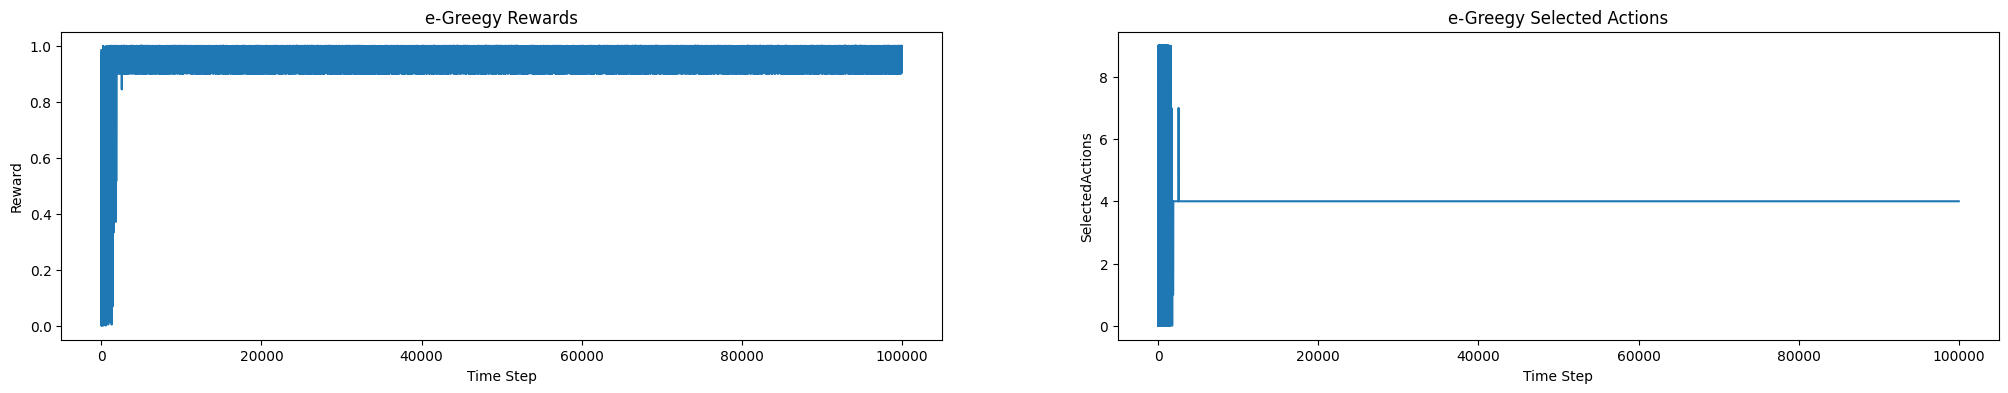

In [ ]:
plt.figure(figsize=(25,4))

plt.subplot(1, 2, 1)
plt.plot(range(0,N),Reward)
plt.xlabel('Time Step')
plt.ylabel('Reward')
plt.title('e-Greegy Rewards')

plt.subplot(1, 2, 2)
plt.plot(range(0,N),SelectedActions)
plt.xlabel('Time Step')
plt.ylabel('SelectedActions')
plt.title('e-Greegy Selected Actions' )
#sns.relplot(x=range(0,N), y=Reward, kind="line")